In [28]:
## importing the required libraries

import pandas as pd
import numpy as np
#import lasio
import matplotlib.pyplot as plt
import math
#from sklearn import metrics
#from sklearn.cluster import KMeans
#from sklearn.preprocessing import scale
import seaborn as sns
import pickle
import collections
from zmapio import ZMAPGrid
plt.rcParams['font.size'] = 14.0

In [27]:
data=pd.read_pickle('stage_2_toc_s2_data.pkl')
data

,WELL,PEFWS,GRWS,DENWS,DTWS,DRESWS,Interval,facies_km,facies_hc,facies_sc,S2,TOC,LOM,dlogR
11008.0,ANASAZI `16` STATE 1,2.865,103.895,2.594,68.471,15.191,WC A,0,1,1,2.585085,1.319427,9.847191,0.305908
11008.5,ANASAZI `16` STATE 1,2.809,98.146,2.595,67.866,14.876,WC A,0,1,1,2.405933,1.227988,9.847191,0.284708
11009.0,ANASAZI `16` STATE 1,2.764,93.175,2.598,67.542,14.776,WC A,0,1,1,2.326419,1.187404,9.847191,0.275299
11009.5,ANASAZI `16` STATE 1,2.820,87.963,2.601,67.714,15.113,WC A,0,1,1,2.438252,1.244483,9.847191,0.288533
11010.0,ANASAZI `16` STATE 1,2.938,86.100,2.597,68.097,15.504,WC A,0,1,1,2.596725,1.325368,9.847191,0.307286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8794.5,WHITE CITY UNIT COM 2,3.796,108.610,2.622,82.344,6.037,WC A,0,1,1,1.276287,0.705267,10.131248,0.182603
8795.0,WHITE CITY UNIT COM 2,3.753,112.532,2.622,82.870,6.225,WC A,0,1,1,1.442902,0.797337,10.131248,0.206441
8795.5,WHITE CITY UNIT COM 2,3.723,114.131,2.617,83.369,6.268,WC A,1,1,1,1.533552,0.847430,10.131248,0.219411
8796.0,WHITE CITY UNIT COM 2,3.697,113.658,2.611,84.140,6.131,WC A,1,1,1,1.574247,0.869917,10.131248,0.225233


In [4]:
well_key=np.unique(data['WELL'])

In [29]:
np.unique(data['Interval'])

array(['WC A'], dtype=object)

[1.61274488 3.70758997 5.27322133]


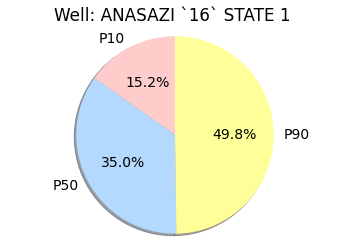

[ 4.71470043  8.3163731  10.01840243]


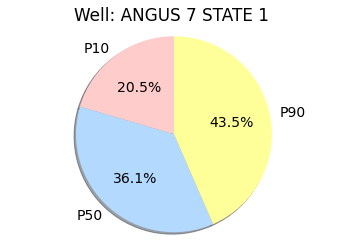

[0.38679095 2.03701789 3.64856091]


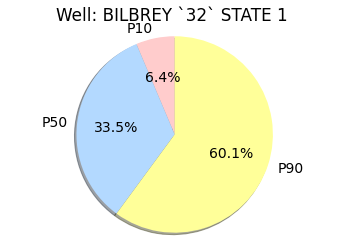

[0.91488446 2.06371853 4.22476686]


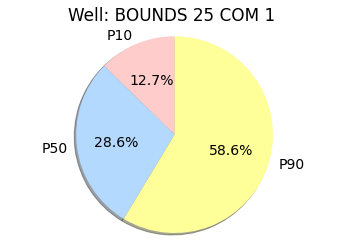

[0.20796721 1.11794043 2.60036487]


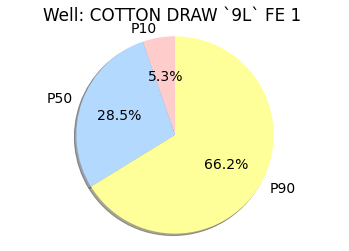

[ 4.99954623  8.98124877 11.10572066]


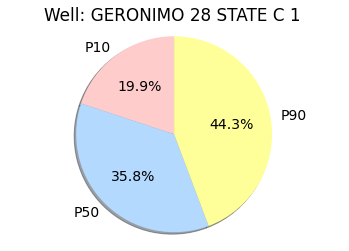

[3.01425964 4.79019019 7.51703196]


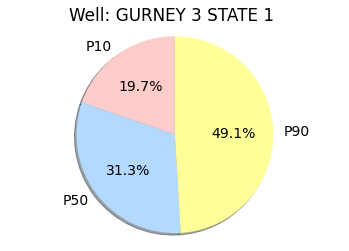

[0.67084987 1.19987797 4.54157932]


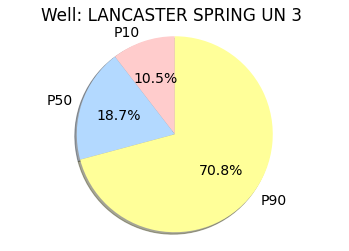

[0.84816647 3.05194852 4.52788215]


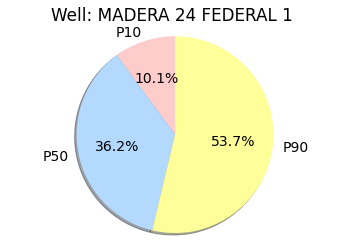

[0.52565527 5.11483168 7.36754539]


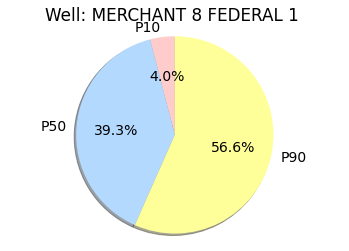

[ 6.28527152 10.53321721 15.41652236]


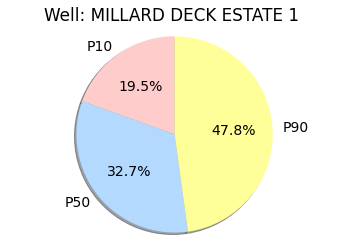

[0.03354421 0.86671766 3.55482764]


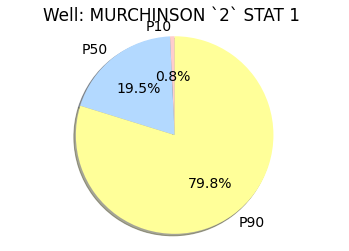

[1.32970394 2.58018249 5.30444188]


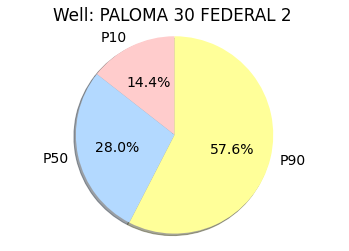

[-1.2401075  -0.02346553  2.33654628]


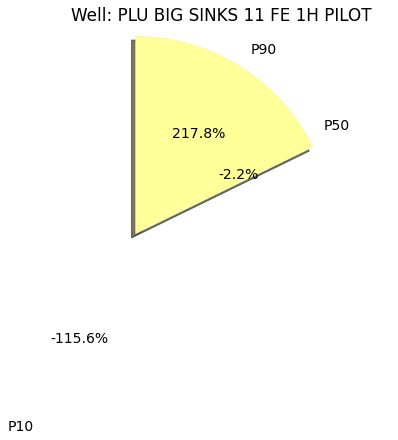

[3.05408429 4.818053   5.91999363]


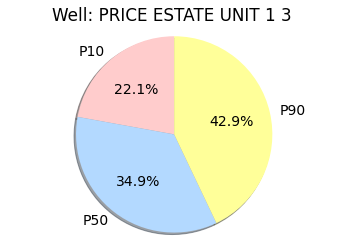

[4.63358319 5.72101415 7.35662866]


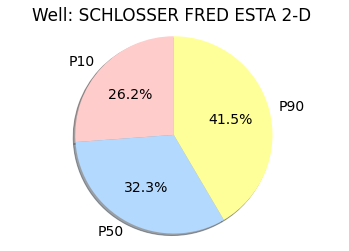

[2.46383258 4.21630814 5.56330866]


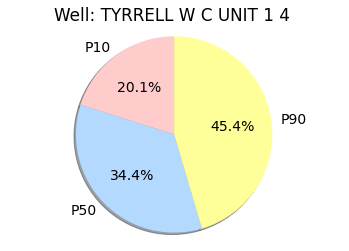

[4.10209954 5.55494826 7.36982655]


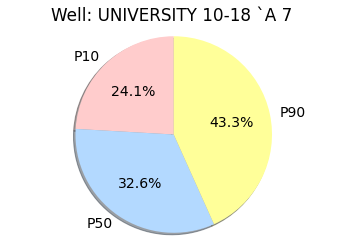

[4.02294931 5.39087191 6.52976516]


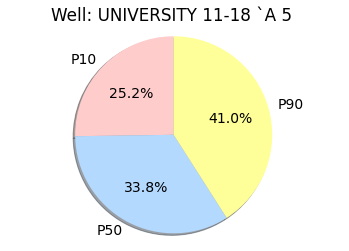

[2.73216293 4.47063879 6.32482141]


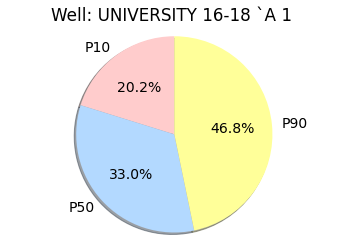

[1.33297641 4.69005327 6.94525902]


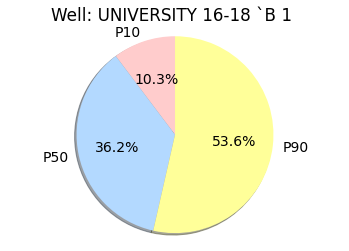

[3.58958979 5.22763732 7.1586934 ]


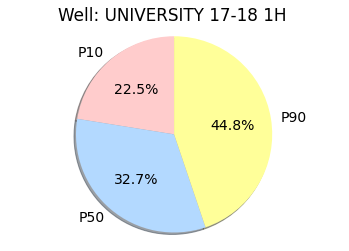

[0.74801892 3.36840991 5.38383469]


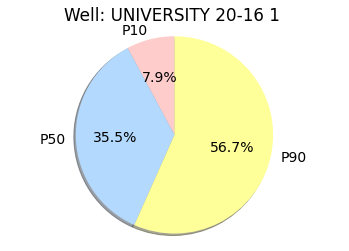

[0.79342782 3.23855567 4.92355767]


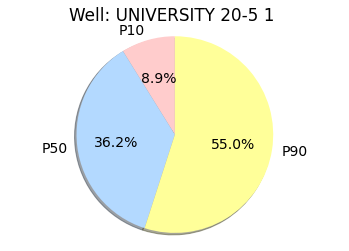

[1.01616283 2.92405068 5.7069343 ]


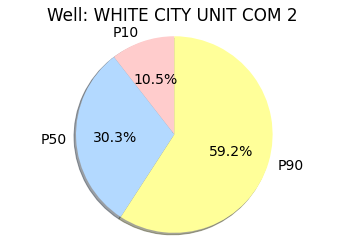

In [11]:
plt.rcParams['font.size'] = 14.0
for i in well_key:
    df=data['TOC'].loc[data['WELL']==i]
    p=np.percentile(df, [10,50,90])
    print(p)
        
    labels=['P10', 'P50', 'P90']
    colors=['#ffcccc','#b3d9ff','#ffff99']
    fig, ax= plt.subplots()
    ax.pie(p, labels=labels, shadow=True, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.tick_params(labelsize=14)
    ax.axis('equal')
    ax.set_title('Well: %s '%i)
    plt.show()

In [14]:
plt.rcParams['font.size'] = 14.0

p10=[]
p50=[]
p90=[]

for i in well_key:
    df=data['TOC'].loc[data['WELL']==i]
    p10.append(np.percentile(df, 10))
    p50.append(np.percentile(df, 50))
    p90.append(np.percentile(df, 90))

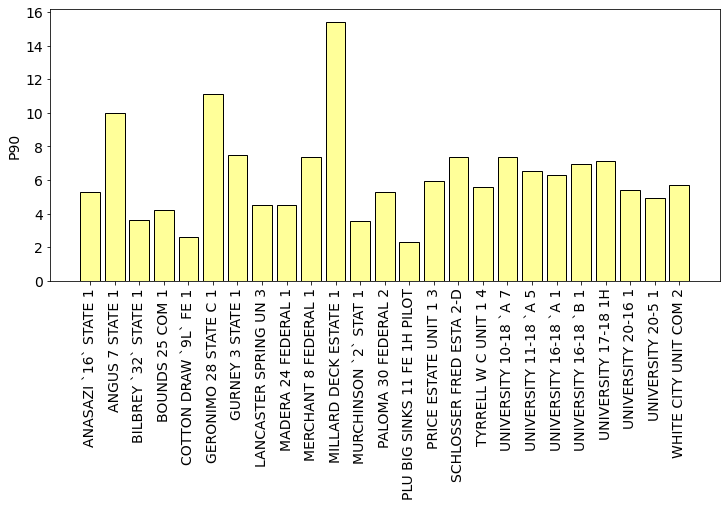

In [28]:
plt.figure(figsize=(12, 5))
plt.bar(well_key, p90, color='#ffff99', edgecolor='black')
plt.xticks(well_key, rotation=90)
plt.ylabel('P90')
plt.show()

## Wells with TOC in the basin

In [17]:

import mplcursors
%matplotlib nbagg

ModuleNotFoundError: No module named 'mplcursors'

In [5]:
top_map=ZMAPGrid('New-Wolfcamp_A.dat')
df_lom=pd.read_csv('31_WELL_COORDS.csv', index_col=0)

In [25]:
df_lom

,Well Name,UWI,Surf X,Surf Y,VR_WC_A.dat,VR_WC_B.dat,Average,LOM,Unnamed: 9,TR-B_WC_A.dat,TR-DE_WC_DE.dat,Unnamed: 12,Data
6.0,PRICE ESTATE UNIT 1 3,4.24E+13,2280607.0,11267636.3,0.867221,0.899344,0.883283,9.275141,NaN,65.612930,37.259293,NaN,Well-log
80.0,TYRRELL W C UNIT 1 4,4.24E+13,2277136.9,11272178.5,0.868515,0.902157,0.885336,9.284070,NaN,65.807854,37.496563,NaN,Well-log
173.0,SCHLOSSER FRED ESTA 2-D,4.24E+13,2209224.3,11298339.1,0.845814,0.869848,0.857831,9.164483,NaN,62.097412,33.171295,NaN,Well-log
188.0,UNIVERSITY 20-5 1,4.23E+13,2152070.6,11524191.5,1.079001,1.125022,1.102011,10.115581,NaN,81.879173,61.720505,NaN,Well-log
308.0,UNIVERSITY 10-18 `A 7,4.25E+13,2181957.9,11482911.2,0.958597,1.013910,0.986254,9.722841,NaN,75.401596,50.622520,NaN,Well-log
309.0,UNIVERSITY 11-18 `A 5,4.25E+13,2184376.3,11480214.1,0.953957,1.008102,0.981029,9.700128,NaN,75.086441,50.117683,NaN,Well-log
328.0,UNIVERSITY 20-16 1,4.23E+13,2158497.6,11514398.1,1.054553,1.104756,1.079654,10.065899,NaN,80.740784,59.641380,NaN,Well-log
330.0,UNIVERSITY 17-18 1H,4.25E+13,2213314.5,11458580.8,0.947647,0.998404,0.973025,9.665328,NaN,74.639420,49.447186,NaN,Well-log
331.0,REEVES `BG` FEE 2,4.24E+13,2057748.4,11316417.6,0.882808,0.924033,0.903420,9.362698,NaN,67.893417,40.100269,NaN,Well-log
429.0,UNIVERSITY 16-18 `B 1,4.25E+13,2190309.5,11449776.5,0.930838,0.970056,0.950447,9.567161,NaN,73.270935,47.367947,NaN,Well-log


In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
top_map.plot()
df=df_lom.loc[df_lom['Well Name'].isin(well_key)]
labels=df['Well Name'].values
ax.scatter(df['Surf X'], df['Surf Y'], zorder=1, 
           alpha= 0.8, c='r', s=18)
ax.set_title('Wells in Wolfcamp interval A')

#mplcursors.cursor(ax, hover=True).connect(
 #   "add", lambda sel: sel.annotation.set_text(labels[sel.target.index]))

plt.show()

In [18]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

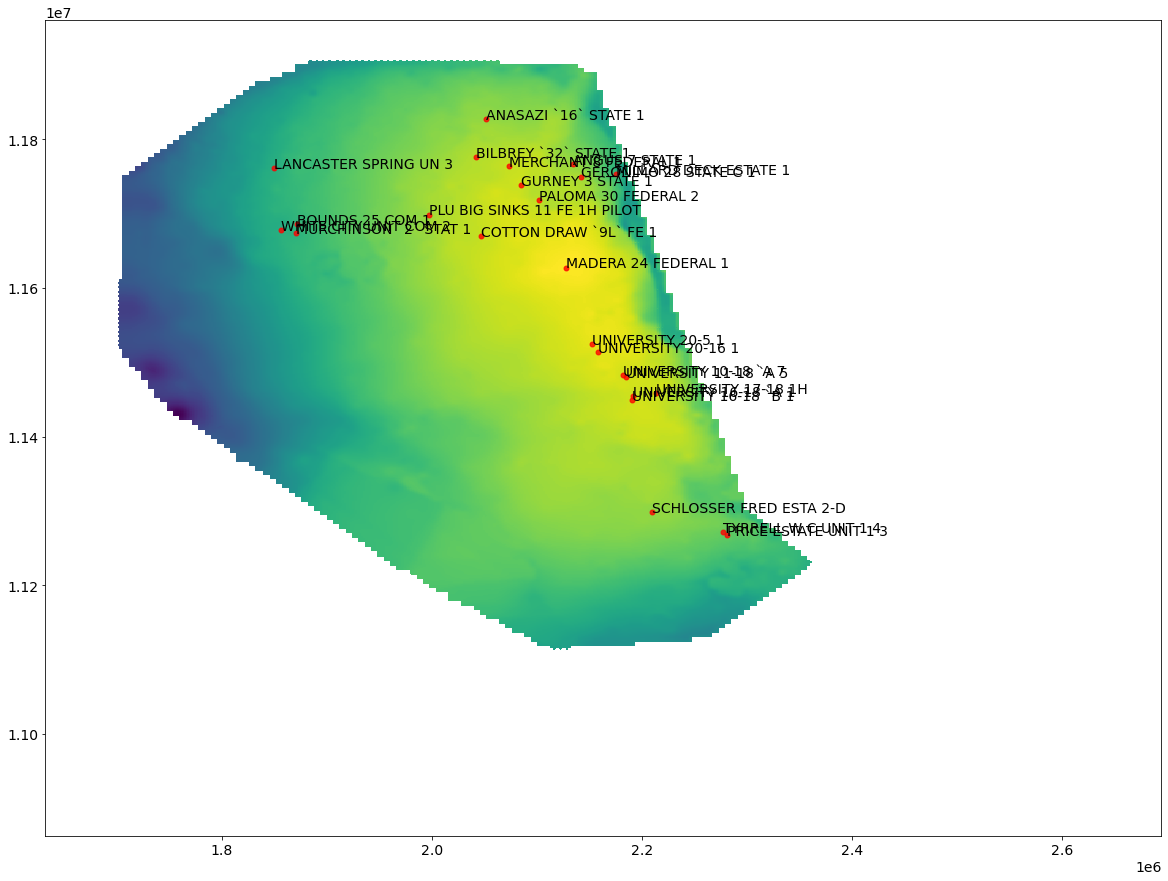

In [24]:
fig, ax = plt.subplots(figsize = (20,15))
top_map.plot()
ax.scatter(df['Surf X'], df['Surf Y'], zorder=1, 
           alpha= 0.8, c='r', s=24)
label_point(df['Surf X'], df['Surf Y'], df['Well Name'], ax)

## Adding P10, P50, P90 into the data

In [61]:
df_info=df_lom[['Well Name', 'UWI', 'Surf X', 'Surf Y', 'LOM']]
df_info.head()

,Well Name,UWI,Surf X,Surf Y,LOM
6.0,PRICE ESTATE UNIT 1 3,4.24E+13,2280607.0,11267636.3,9.275141
80.0,TYRRELL W C UNIT 1 4,4.24E+13,2277136.9,11272178.5,9.284070
173.0,SCHLOSSER FRED ESTA 2-D,4.24E+13,2209224.3,11298339.1,9.164483
188.0,UNIVERSITY 20-5 1,4.23E+13,2152070.6,11524191.5,10.115581
308.0,UNIVERSITY 10-18 `A 7,4.25E+13,2181957.9,11482911.2,9.722841


In [62]:
df_info.loc[:,'p10']=0


D:\Programs\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
D:\Programs\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [64]:
df_info['p50']=0
df_info['p90']=0

D:\Programs\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Programs\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
df_info.head()

,Well Name,UWI,Surf X,Surf Y,LOM,p10,p50,p90
6.0,PRICE ESTATE UNIT 1 3,4.24E+13,2280607.0,11267636.3,9.275141,0,0,0
80.0,TYRRELL W C UNIT 1 4,4.24E+13,2277136.9,11272178.5,9.284070,0,0,0
173.0,SCHLOSSER FRED ESTA 2-D,4.24E+13,2209224.3,11298339.1,9.164483,0,0,0
188.0,UNIVERSITY 20-5 1,4.23E+13,2152070.6,11524191.5,10.115581,0,0,0
308.0,UNIVERSITY 10-18 `A 7,4.25E+13,2181957.9,11482911.2,9.722841,0,0,0


In [66]:
df_info=df_info.loc[df_info['Well Name'].isin(well_key)]

In [67]:
df_info=df_info.reset_index()


In [69]:
df_info=df_info.drop(['index'], axis=1)

In [70]:
df_info

,Well Name,UWI,Surf X,Surf Y,LOM,p10,p50,p90
0,PRICE ESTATE UNIT 1 3,4.24E+13,2280607.0,11267636.3,9.275141,0,0,0
1,TYRRELL W C UNIT 1 4,4.24E+13,2277136.9,11272178.5,9.284070,0,0,0
2,SCHLOSSER FRED ESTA 2-D,4.24E+13,2209224.3,11298339.1,9.164483,0,0,0
3,UNIVERSITY 20-5 1,4.23E+13,2152070.6,11524191.5,10.115581,0,0,0
4,UNIVERSITY 10-18 `A 7,4.25E+13,2181957.9,11482911.2,9.722841,0,0,0
5,UNIVERSITY 11-18 `A 5,4.25E+13,2184376.3,11480214.1,9.700128,0,0,0
6,UNIVERSITY 20-16 1,4.23E+13,2158497.6,11514398.1,10.065899,0,0,0
7,UNIVERSITY 17-18 1H,4.25E+13,2213314.5,11458580.8,9.665328,0,0,0
8,UNIVERSITY 16-18 `B 1,4.25E+13,2190309.5,11449776.5,9.567161,0,0,0
9,MURCHINSON `2` STAT 1,3.00E+13,1870346.0,11674210.6,10.097984,0,0,0


In [75]:
df_info['p10'].iloc[0]

0

In [76]:
for i in df_info.index:
    well=df_info['Well Name'].iloc[i]
    df=data['TOC'].loc[data['WELL']==well]
    p=np.percentile(df, [10,50,90])
    df_info['p10'].iloc[i]=p[0]
    df_info['p50'].iloc[i]=p[1]
    df_info['p90'].iloc[i]=p[2]

D:\Programs\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [77]:
df_info

,Well Name,UWI,Surf X,Surf Y,LOM,p10,p50,p90
0,PRICE ESTATE UNIT 1 3,4.24E+13,2280607.0,11267636.3,9.275141,3.054084,4.818053,5.919994
1,TYRRELL W C UNIT 1 4,4.24E+13,2277136.9,11272178.5,9.284070,2.463833,4.216308,5.563309
2,SCHLOSSER FRED ESTA 2-D,4.24E+13,2209224.3,11298339.1,9.164483,4.633583,5.721014,7.356629
3,UNIVERSITY 20-5 1,4.23E+13,2152070.6,11524191.5,10.115581,0.793428,3.238556,4.923558
4,UNIVERSITY 10-18 `A 7,4.25E+13,2181957.9,11482911.2,9.722841,4.102100,5.554948,7.369827
5,UNIVERSITY 11-18 `A 5,4.25E+13,2184376.3,11480214.1,9.700128,4.022949,5.390872,6.529765
6,UNIVERSITY 20-16 1,4.23E+13,2158497.6,11514398.1,10.065899,0.748019,3.368410,5.383835
7,UNIVERSITY 17-18 1H,4.25E+13,2213314.5,11458580.8,9.665328,3.589590,5.227637,7.158693
8,UNIVERSITY 16-18 `B 1,4.25E+13,2190309.5,11449776.5,9.567161,1.332976,4.690053,6.945259
9,MURCHINSON `2` STAT 1,3.00E+13,1870346.0,11674210.6,10.097984,0.033544,0.866718,3.554828


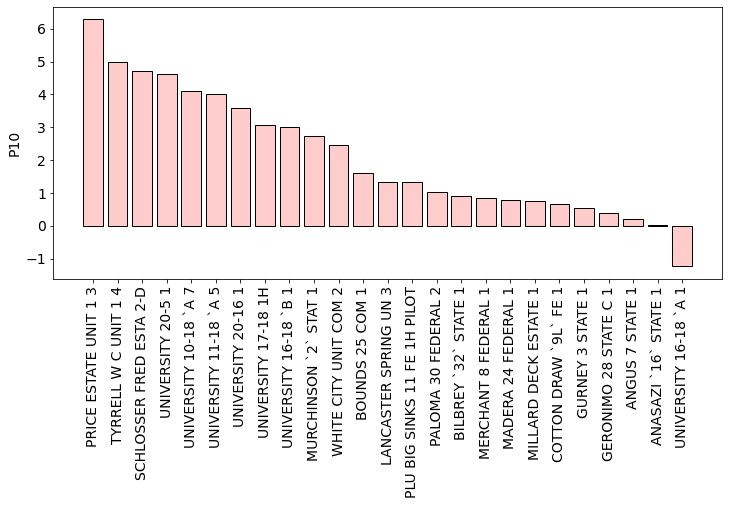

In [83]:
plt.figure(figsize=(12, 5))
plt.bar(df_info['Well Name'], df_info.sort_values('p10', ascending=False)['p10'], color='#ffcccc', edgecolor='black')
plt.xticks(df_info['Well Name'], rotation=90)
plt.ylabel('P10')
plt.show()

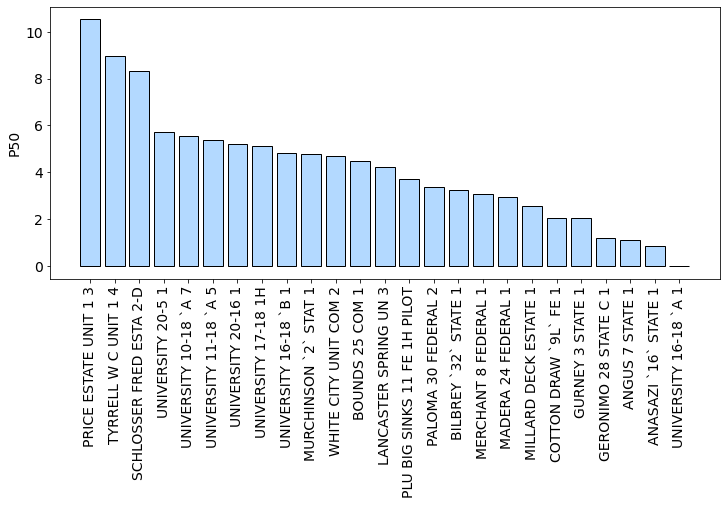

In [85]:
plt.figure(figsize=(12, 5))
plt.bar(df_info['Well Name'], df_info.sort_values('p50', ascending=False)['p50'], color='#b3d9ff', edgecolor='black')
plt.xticks(df_info['Well Name'], rotation=90)
plt.ylabel('P50')
plt.show()

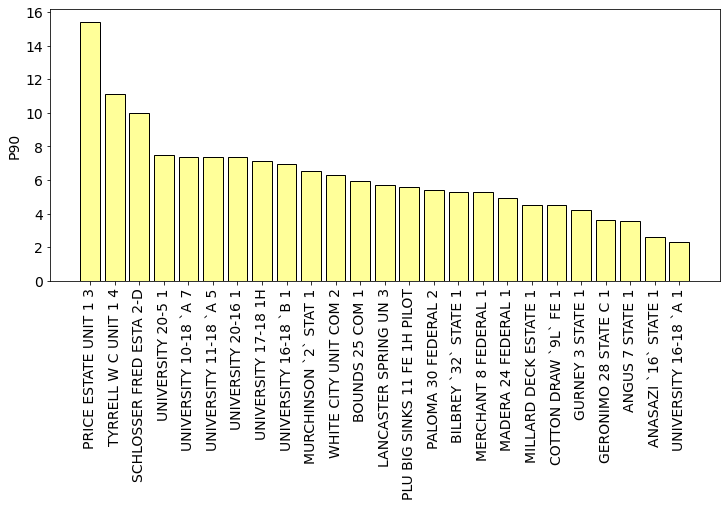

In [84]:
plt.figure(figsize=(12, 5))
plt.bar(df_info['Well Name'], df_info.sort_values('p90', ascending=False)['p90'], color='#ffff99', edgecolor='black')
plt.xticks(df_info['Well Name'], rotation=90)
plt.ylabel('P90')
plt.show()

In [86]:
df_info.to_pickle('stage_2_25_well_info.pkl')